## Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

df = pd.read_pickle('data/breast_cancer.pkl')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    float64
 1   diagnosis                569 non-null    float64
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Cleaning the data data

In [4]:
# getting an idea of the size of the data
df.shape

(569, 32)

So we have 32 columns (and 569 observations). One of these is the `id` column, another is the `diagnosis` (which will be our y-vector). That meas what we have 30 features that we need to work with. Let's see if we can reduce that number somewhat.

In [5]:
# Checking for null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# checking whether there is strange data in the diagnostics (the y-vector)
df['diagnosis'].unique()

array([1., 0.])

In [8]:
# count number of observations in each class
benign, malignant = df['diagnosis'].value_counts()
print(f'Number of cells labeled Benign: {benign}')
print(f'Number of cells labeled Malignant: {malignant}')
print('')
print(f'percentage of cells labeled Benign: {round(benign / len(df) * 100, 2)}%')
print(f'percentage of cells labeled Malignant: {round(malignant / len(df) * 100, 2)}%')

Number of cells labeled Benign: 357
Number of cells labeled Malignant: 212

percentage of cells labeled Benign: 62.74%
percentage of cells labeled Malignant: 37.26%


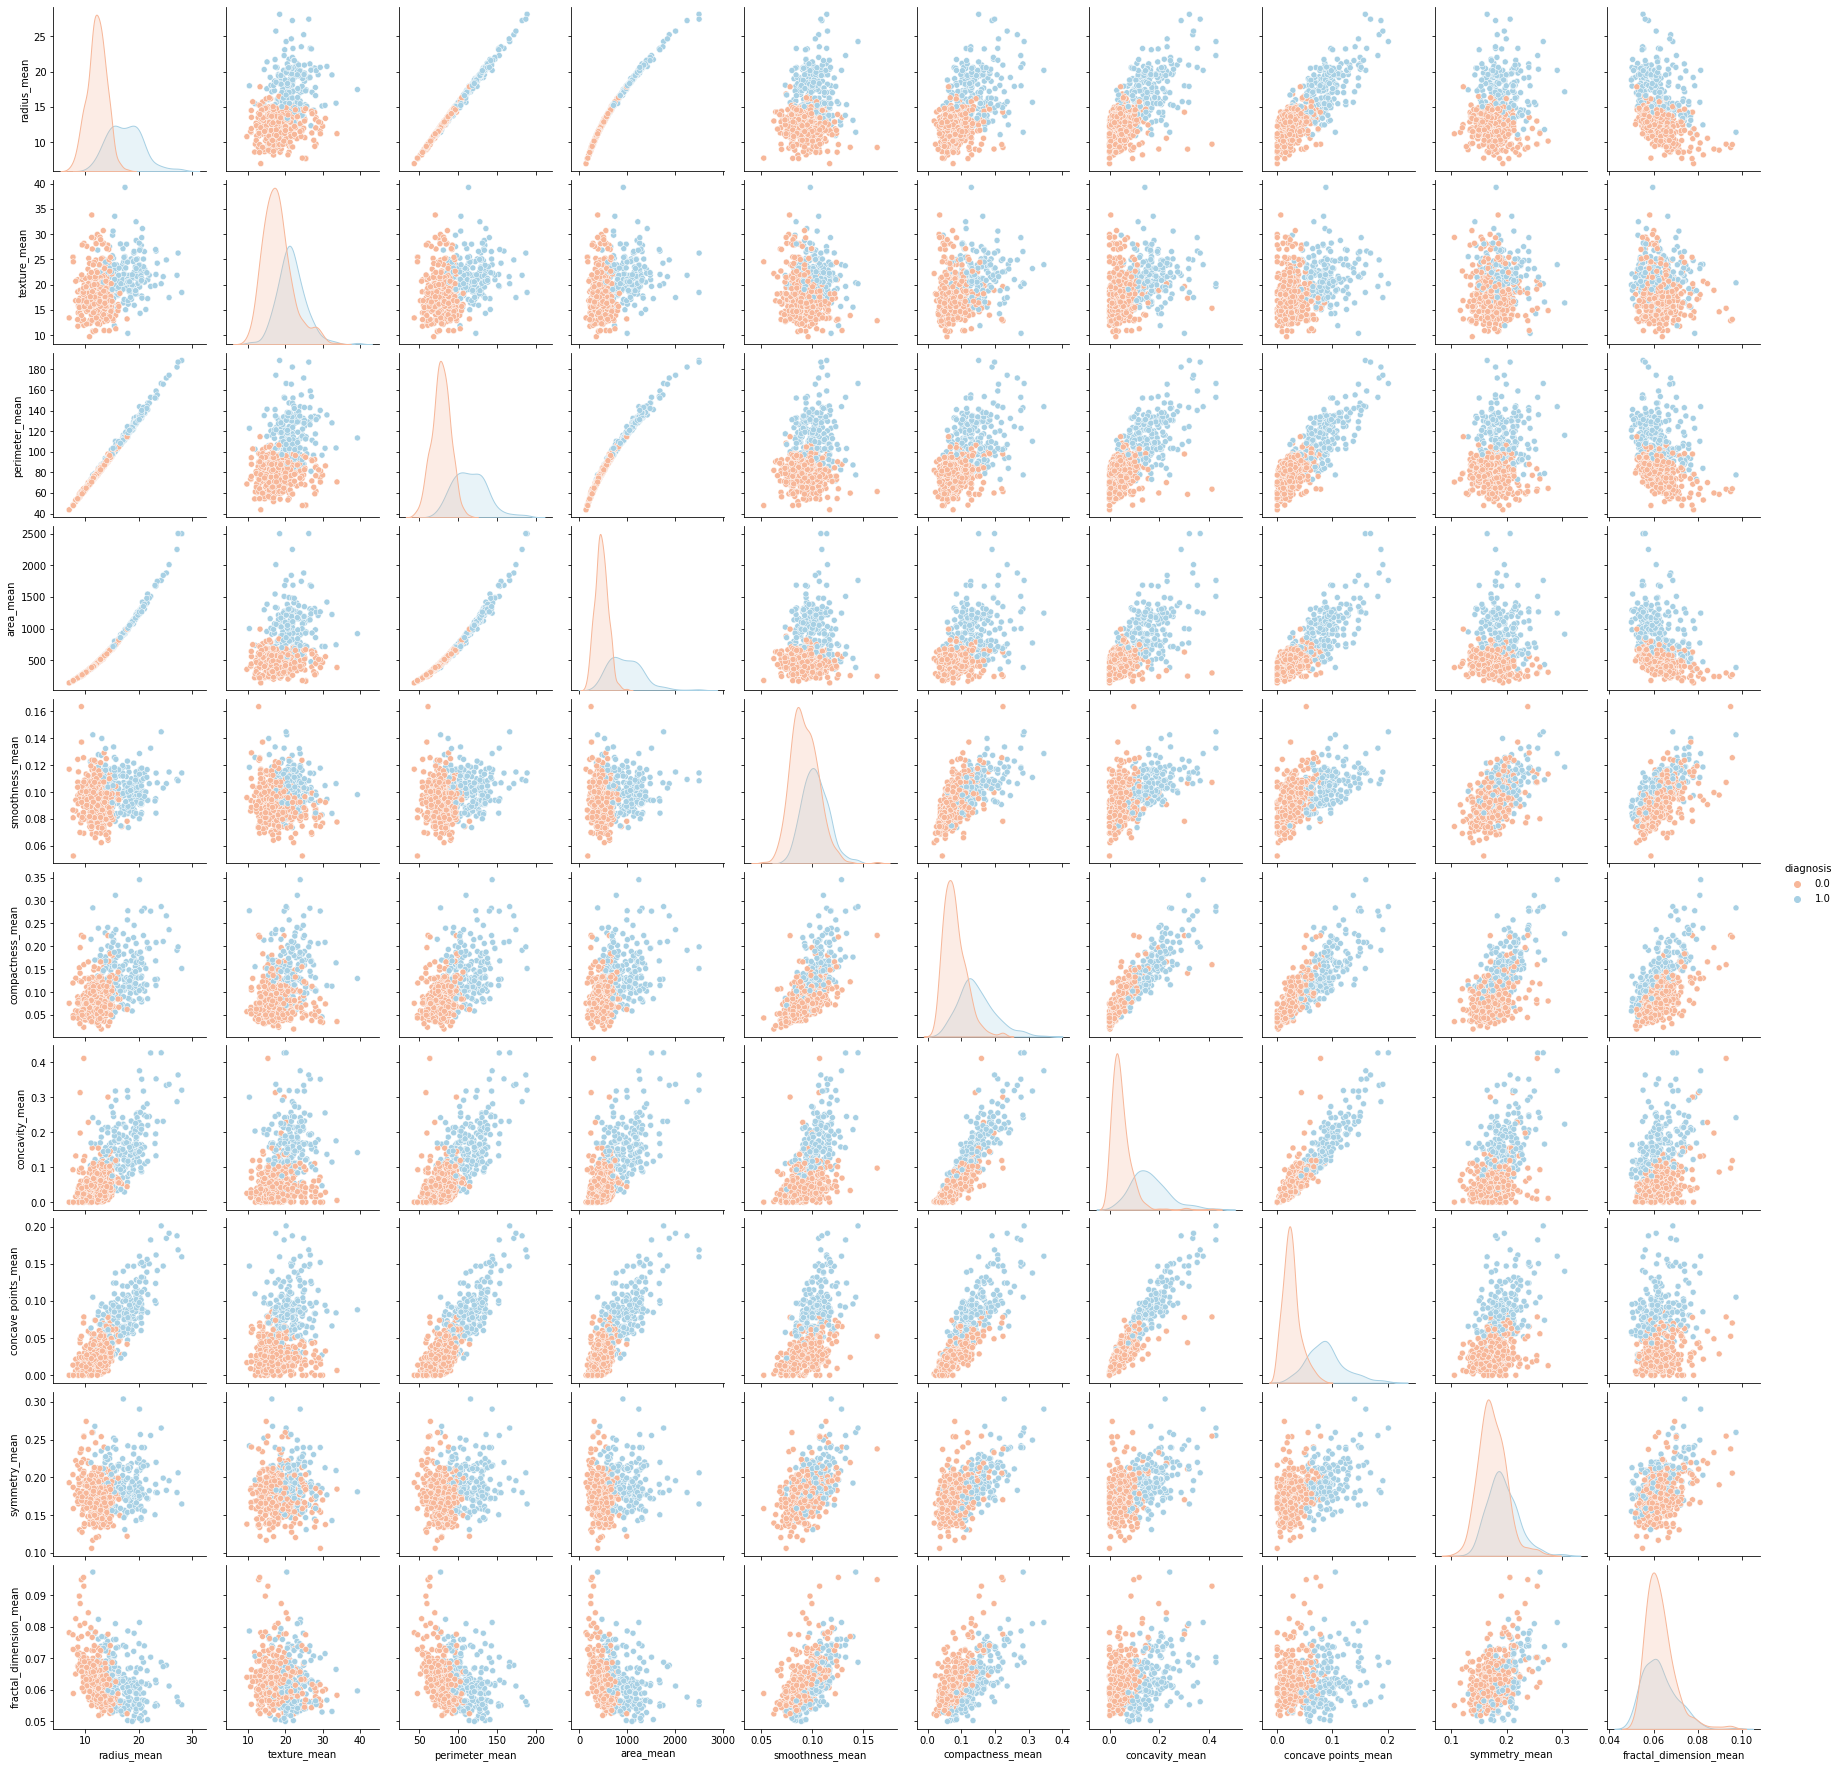

In [12]:
# Let's keep only the mean-values of the observations and ignore the _se and _worst cases 
# drawing relations between these features to check whether there are high correlations between any of them.
import seaborn as sns

cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='RdBu')


In [13]:
df[cols].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


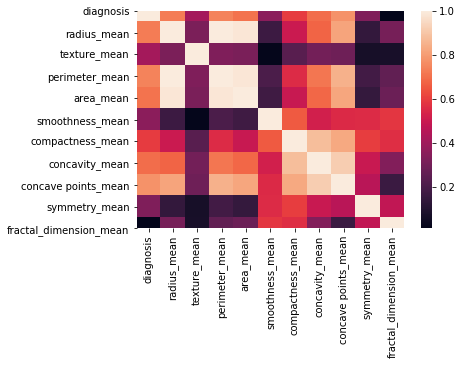

In [8]:
# create a correlation matrix
c = df[cols].corr().abs()
sns.heatmap(c)

As you can see, there's a high correlation between the features `area_mean` and `perimeter_mean` and lots of other features. That means we can remove these two features, as their work is done by other features. So we end up with eight features.

In [15]:
# Create the X-matrix and the y-vector.
cols = [
        'texture_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']
y = np.array(df['diagnosis'])
X = np.array(df[cols])
X.shape

(569, 8)

In [17]:
# Normalize
from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

X = normalize(X)

In [18]:
# Split the data in train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [23]:
# Train the model
# Why would you need a LogisticRegression model in this specific case?
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
history = logreg.fit(X_train, y_train)

In [32]:
# Evaluate the trained model using the test data.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print ('=== [confusion matrix] ==='.center(54))
print(confusion_matrix)
print ('')
print ('=== [classification report] ==='.center(54))
print(classification_report(y_test, y_pred))

              === [confusion matrix] ===              
[[98  3]
 [ 8 62]]

           === [classification report] ===            
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       101
         1.0       0.95      0.89      0.92        70

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [33]:
# So what does our model look like?
print(logreg.coef_)

[[ 1.30598299  2.59622845  0.94320209  0.21218078  1.22685039  1.69721734
  -0.06136676 -0.72328955]]
